A notebook for processing images acquired with the OROCHI simulator to reflectance, with coalignment by stereo geometric calibration.

Processing of Experiments performed on 26/04/2023

- Reflectance Calibration
- Sample 1
- Sample 2
- Sample 3
- Sample 4 (failed)
- Geometric Calibration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

The steps of processing are:
1. Calibration Preparation:
    - Load, average and bias correct Calibration Target images
    - Correct for exposure
    - Load reference reflectance for each channel
    - Scale images to give reflectance calibration coefficient for each pixel
    - Optional: mask for Calibration Target
    - Save reflectance calibration images
2. Sample Reflectance Calibration
    - Load, average and bias correct Sample images
    - Correct for exposure
    - Apply calibration coefficient frames
    - Optional: mask for Calibration Target area and Sample area.
    - Save reflectance images
3. Geometric Alignment
    - Load, average and bias correct Geometric images
    - Balance images (TBD)
    - Extract camera geometric calibration coefficients (TBD)
    - Apply image coregistration (TBD)

# Setup

In [2]:
import orochi_sim_proc as osp
from pathlib import Path

# Homography Calibration

Here we attempt to co-align images by finding the homography matrix between images of the calibration target cap writing.

- Load, average and bias correct geometric images
- choose destination/base image
- for each channel, find homography matrix mapping from channel/source to base
- apply image transformation for each channel.

Load the images

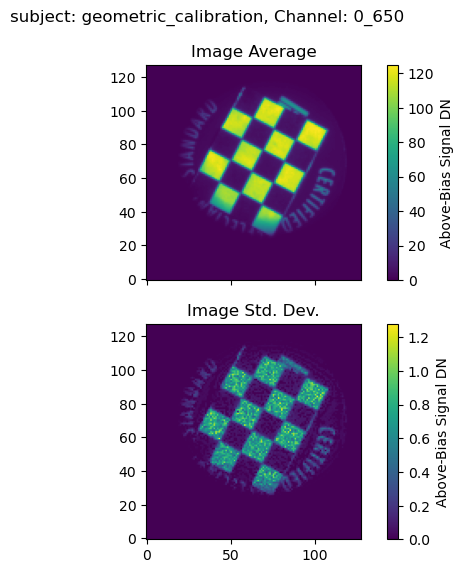

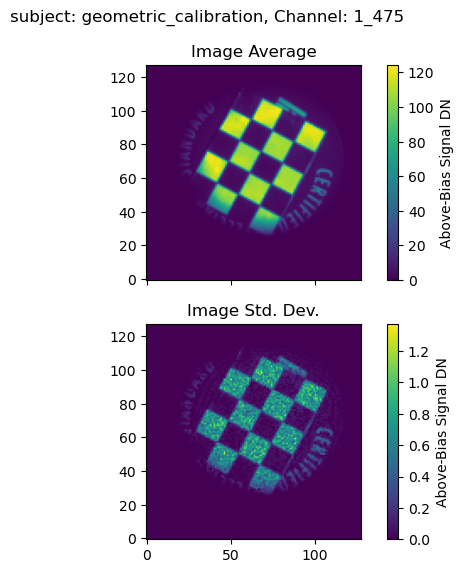

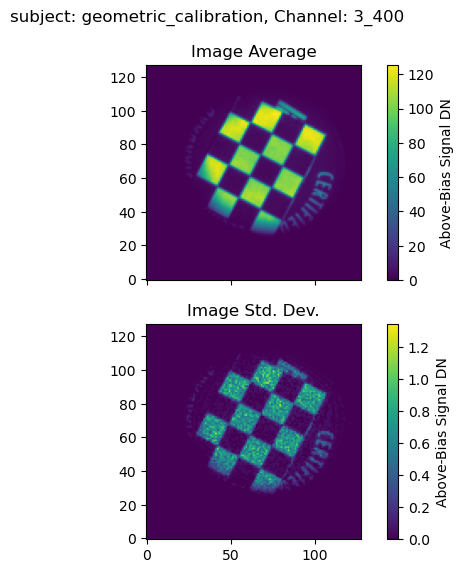

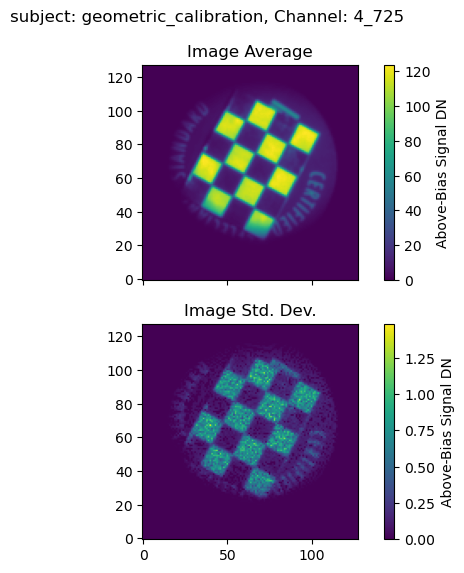

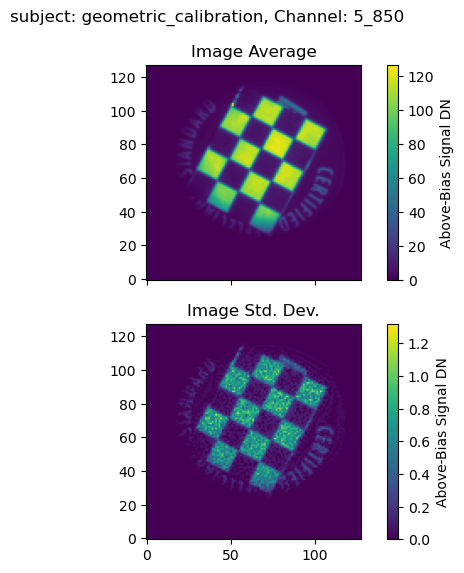

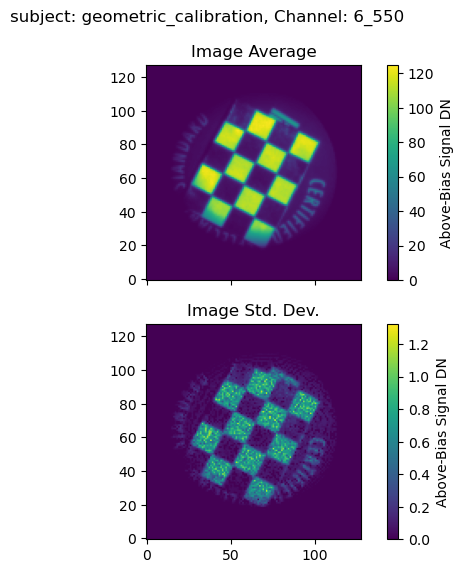

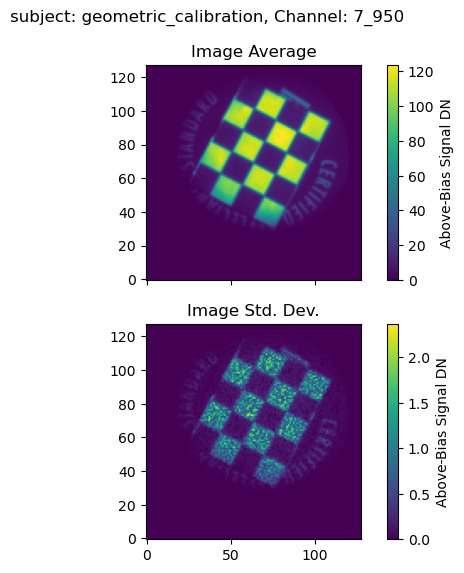

In [14]:
target = 'geometric_calibration'
channels = sorted(list(Path('..', 'data',target).glob('[!_]*')))
geocs = {}
for channel_path in channels:
    channel = channel_path.name
    # load the geometric calibration images
    geoc = osp.LightImage(target, channel)
    geoc.image_load()
    # load the geometric calibration dark frames
    dark_geoc = osp.DarkImage(target, channel)
    dark_geoc.image_load()
    # subtract the dark frame
    geoc.dark_subtract(dark_geoc)
    geoc.image_display(roi=True)
    geocs[channel] = geoc

Learn transform

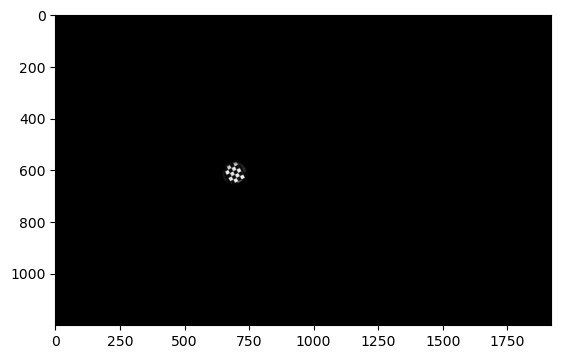

426 source points found


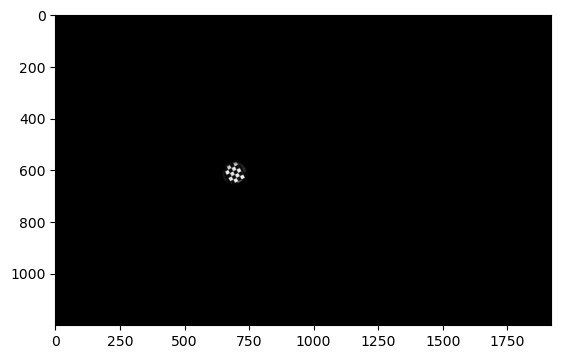

426 destination points found
340 matches found


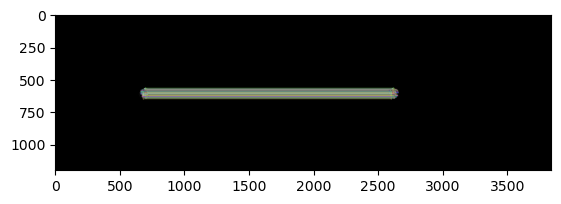

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:492: RuntimeWarning: invalid value encountered in divide
  err = ax[1].imshow(np.abs(query_reg-train_img)/train_img, origin='lower')


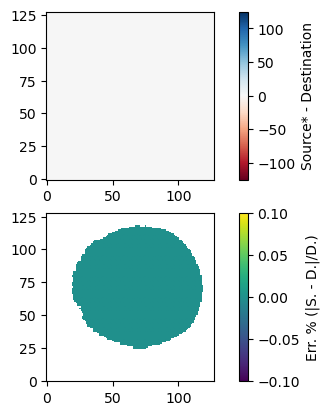

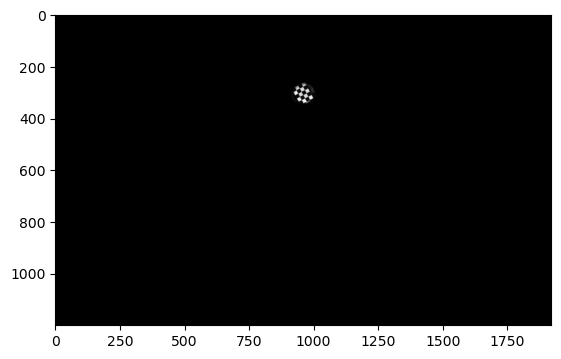

415 source points found


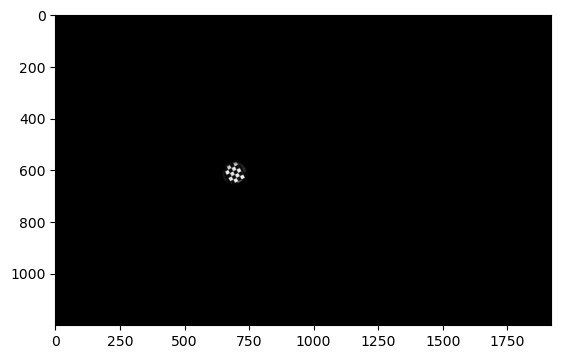

426 destination points found
332 matches found


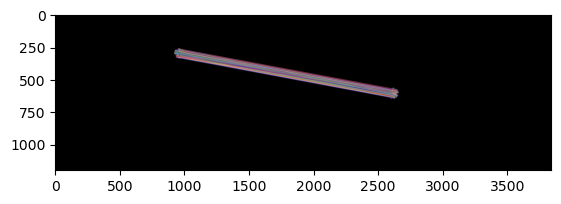

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:492: RuntimeWarning: divide by zero encountered in divide
  err = ax[1].imshow(np.abs(query_reg-train_img)/train_img, origin='lower')


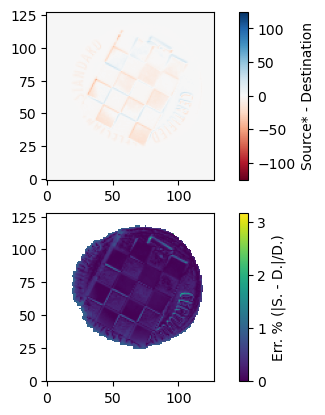

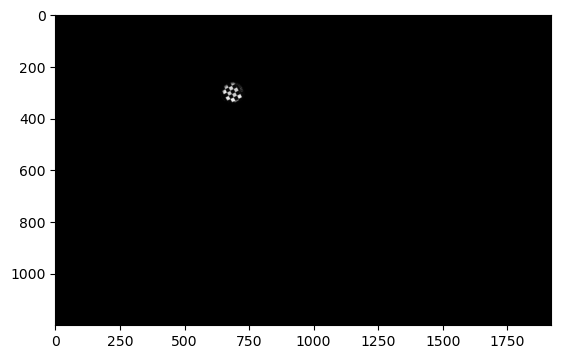

403 source points found


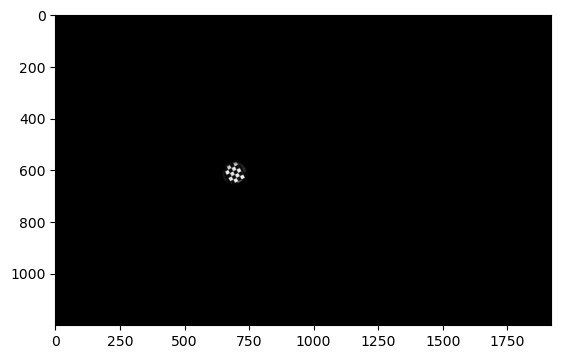

426 destination points found
322 matches found


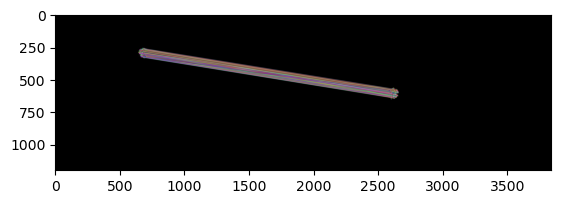

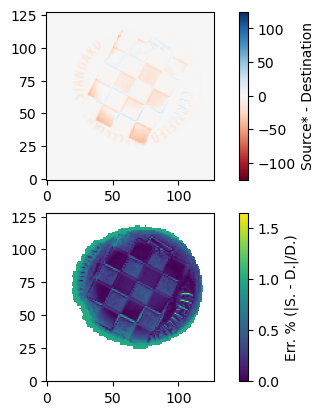

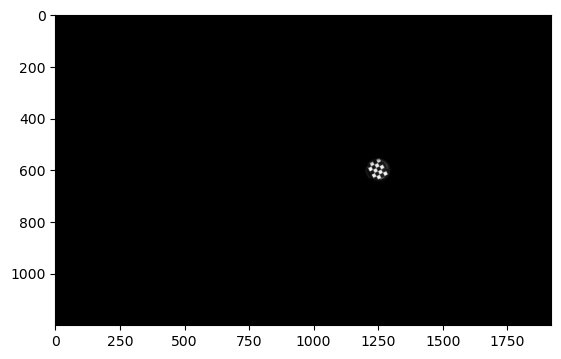

417 source points found


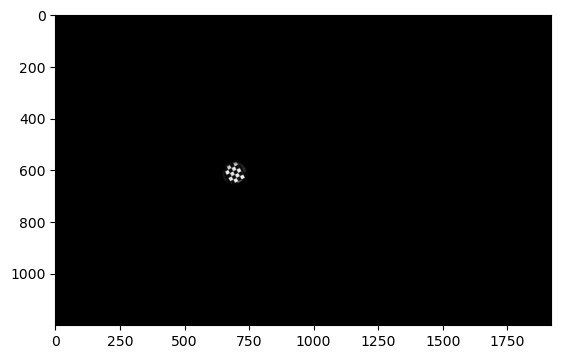

426 destination points found
333 matches found


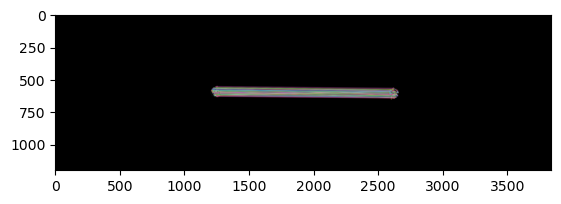

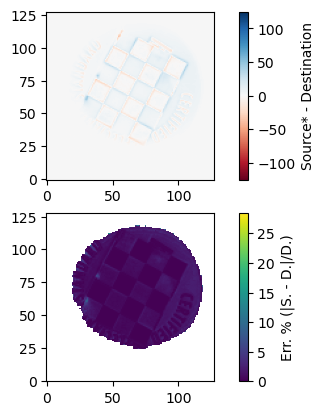

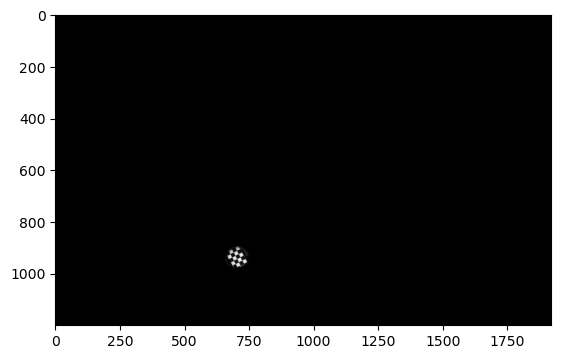

420 source points found


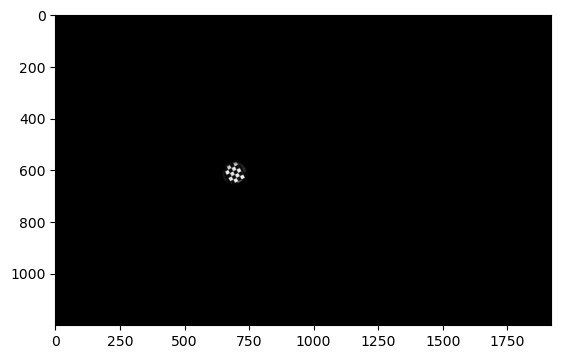

426 destination points found
336 matches found


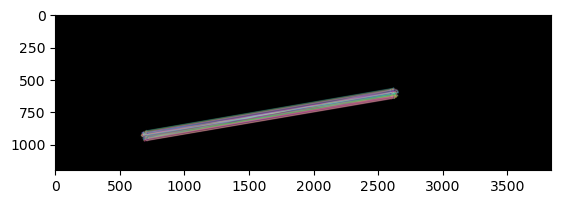

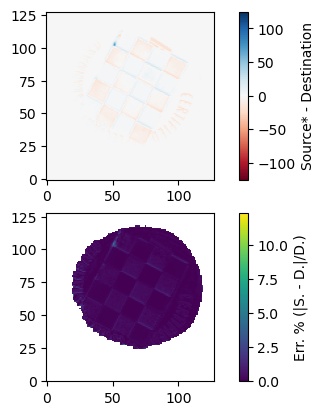

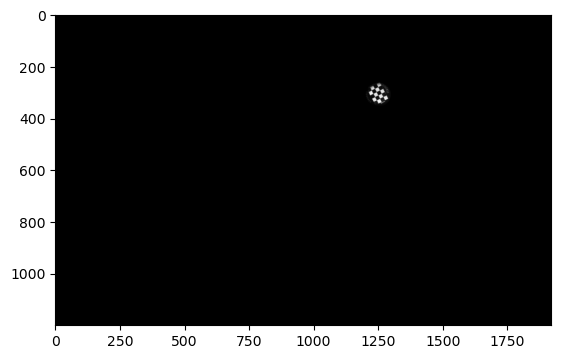

420 source points found


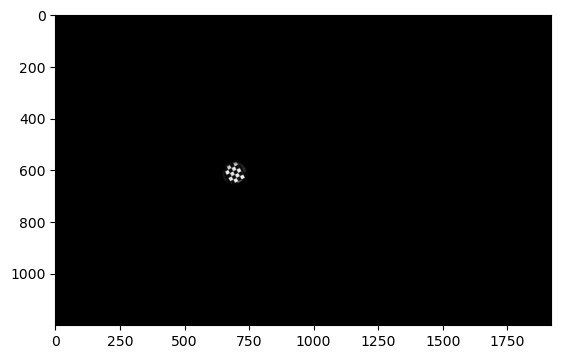

426 destination points found
336 matches found


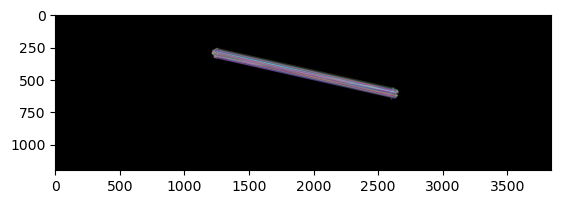

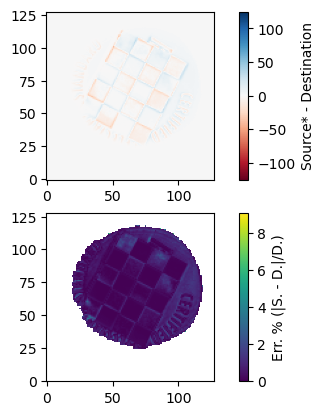

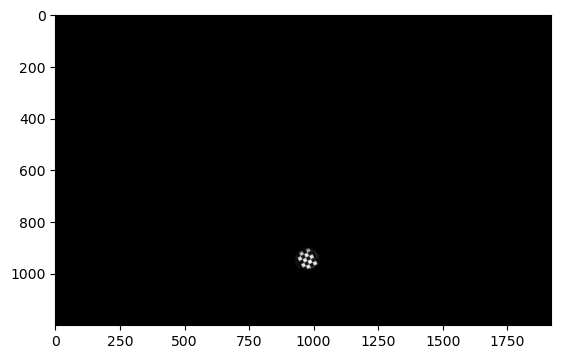

397 source points found


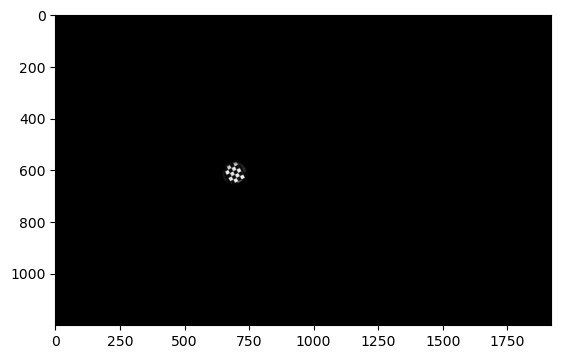

426 destination points found
317 matches found


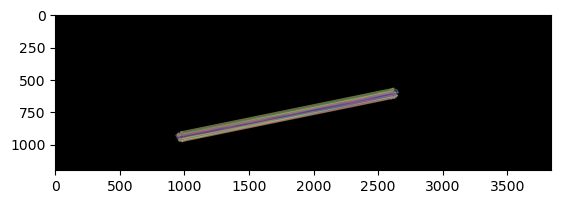

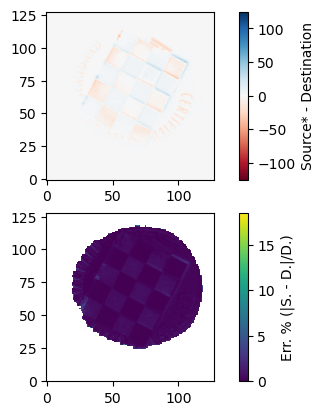

In [65]:
channels = list(geocs.keys())
destination = channels[0]
cali_dest = geocs[destination]
sample_dest = geocs[destination]
coals = {}
for channel in channels:
    cali_src = geocs[channel]    
    src = osp.CoAlignedImage(cali_src, roi=False)
    n_ps = src.find_points('ORB')
    print(f'{n_ps} source points found')
    dest = osp.CoAlignedImage(cali_dest, roi=False)
    n_pd = dest.find_points('ORB')
    print(f'{n_pd} destination points found')
    src.destination = dest
    n_m = src.find_matches('HAMMING')
    print(f'{n_m} matches found')
    src.show_matches()
    src.find_homography('RANSAC')
    src.align_images(roi=True)
    coals[channel] = src


# Calibration Preparation
For each channel:
- Load, average and bias correct Calibration Target images
- Correct for exposure
- Load reference reflectance for each channel
- Scale images to give reflectance calibration coefficient for each pixel
- Optional: mask for Calibration Target
- Save reflectance calibration images

0_650


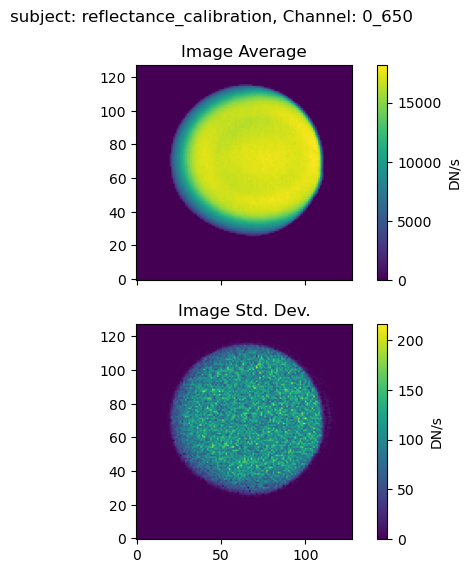

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:303: RuntimeWarning: divide by zero encountered in divide
  """Class for handling Reflectance Images, inherits Image class."""
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:304: RuntimeWarning: divide by zero encountered in divide
  def __init__(self, source_image: LightImage) -> None:
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:305: RuntimeWarning: divide by zero encountered in divide
  self.dir = source_image.dir
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:305: RuntimeWarning: invalid value encountered in divide
  self.dir = source_image.dir


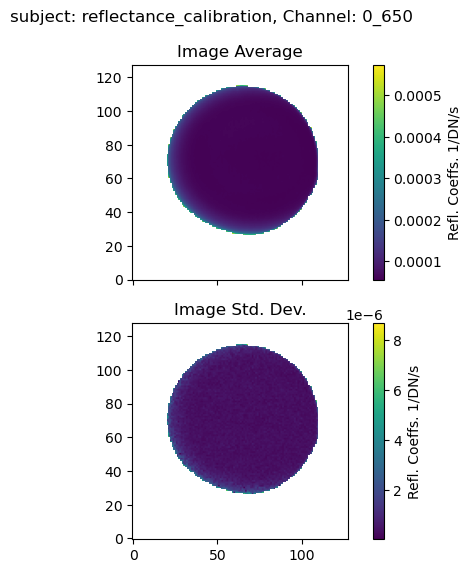

1_475


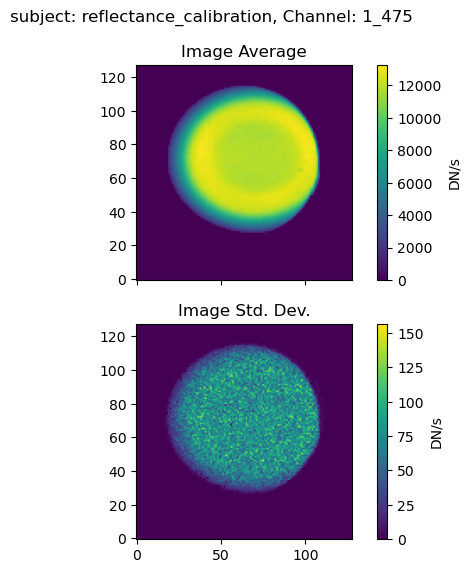

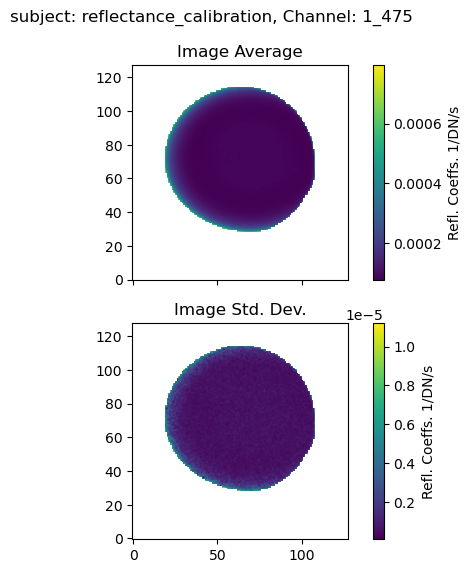

3_400


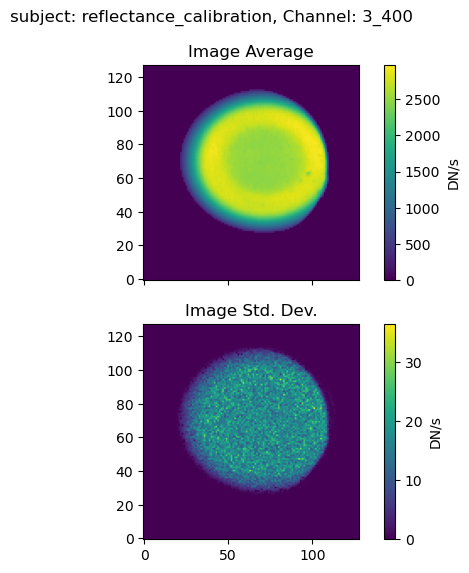

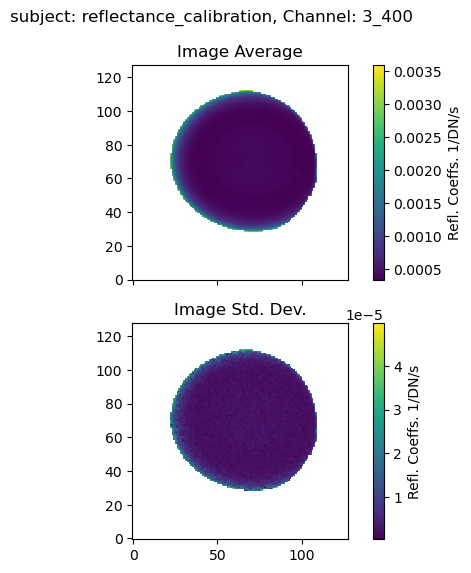

4_725


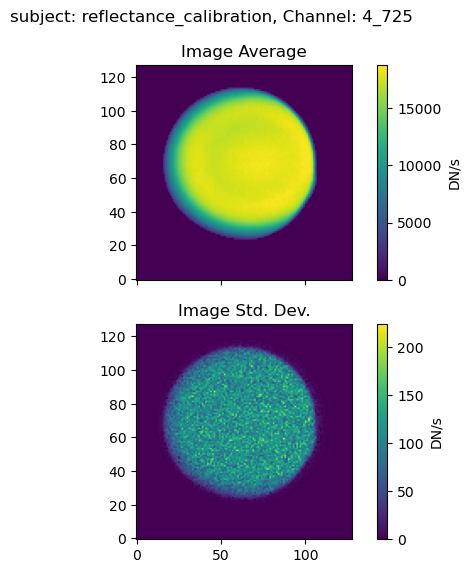

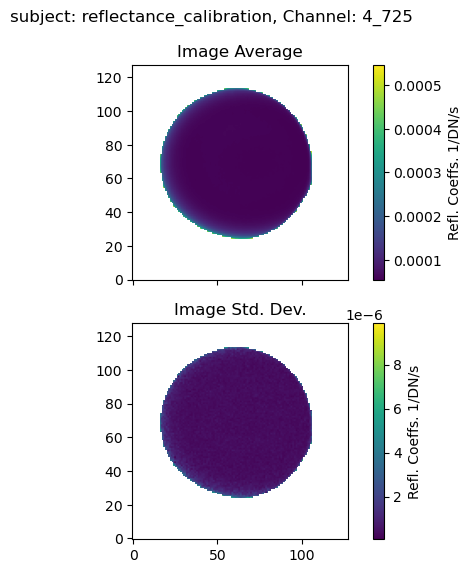

5_850


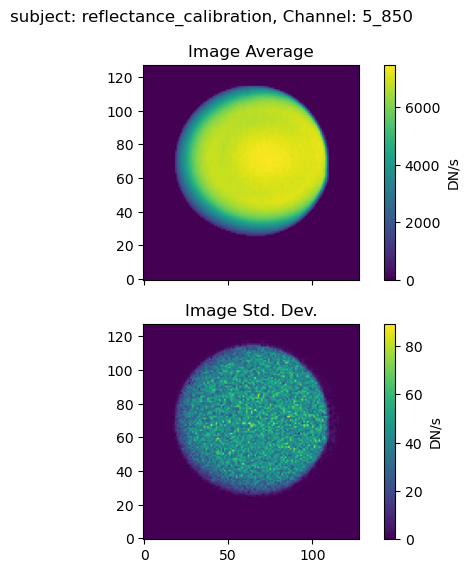

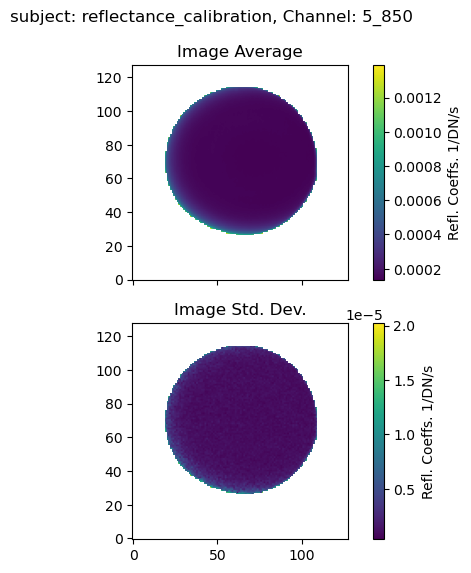

6_550


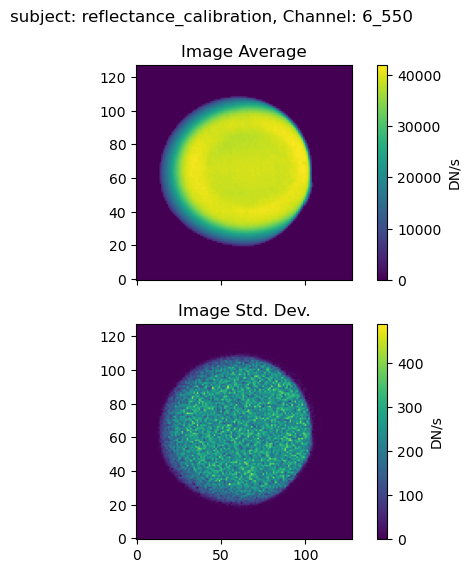

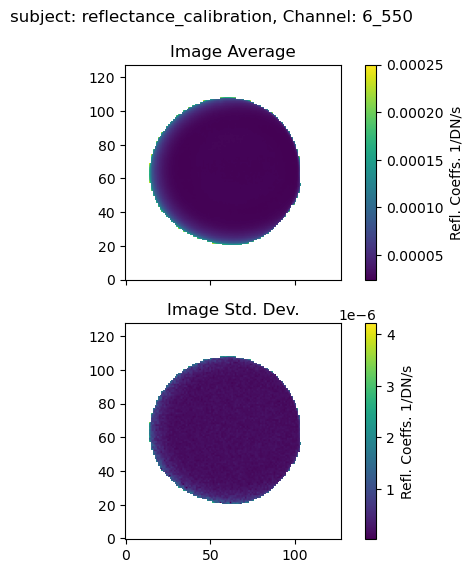

7_950


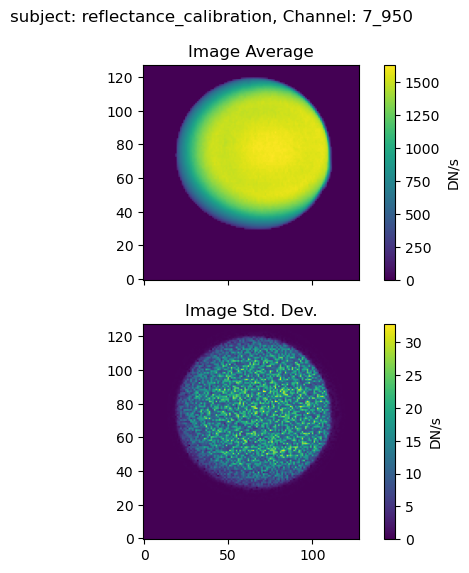

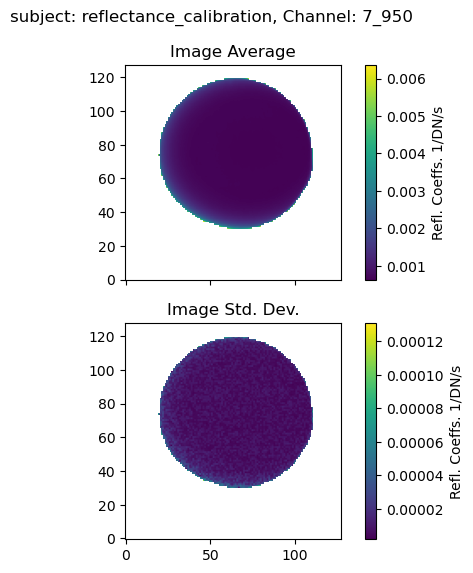

In [56]:
target = 'reflectance_calibration'
channels = sorted(list(Path('..', 'data', target).glob('[!.]*')))
cali_coeffs = {} # store the calibration objects in a dictionary
for channel_path in channels:
    channel = channel_path.name
    print(channel)
    # load the calibration target images
    cali = osp.LightImage(target, channel)
    cali.image_load()
    # check the mean level

    # load the calibration target dark frames
    dark_cali = osp.DarkImage(target, channel)
    dark_cali.image_load()
    # check the mean level
    
    # subtract the dark frame
    cali.dark_subtract(dark_cali)
    # apply exposure correction
    cali.correct_exposure()
    # compute calibration coefficient image
    cali_coeff = osp.CalibrationImage(cali)
    cali_coeff.mask_target()
    cali_coeff.image_display(roi=True)
    cali_coeff.compute_reflectance_coefficients()
    cali_coeff.image_display(roi=True)
    cali_coeffs[channel] = cali_coeff

# Sample Reflectance Calibration
- Load, average and bias correct Sample images
- Correct for exposure
- Apply calibration coefficient frames
- Optional: mask for Calibration Target area and Sample area.
- Save reflectance images

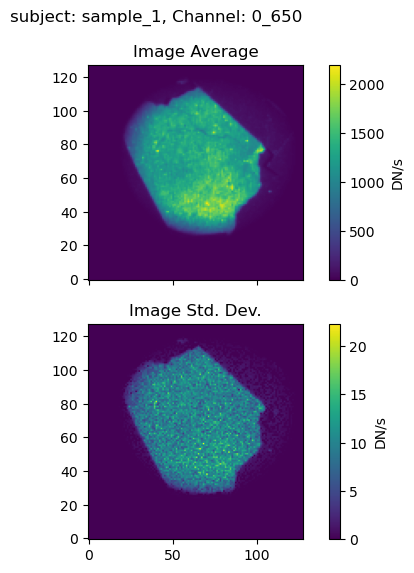

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:340: RuntimeWarning: invalid value encountered in multiply
  self.img_ave = self.img_ave * cali_source.img_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:342: RuntimeWarning: invalid value encountered in divide
  lght_err = self.img_std/lst_ave
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:343: RuntimeWarning: invalid value encountered in divide
  cali_err = cali_source.img_std/cali_source.img_ave


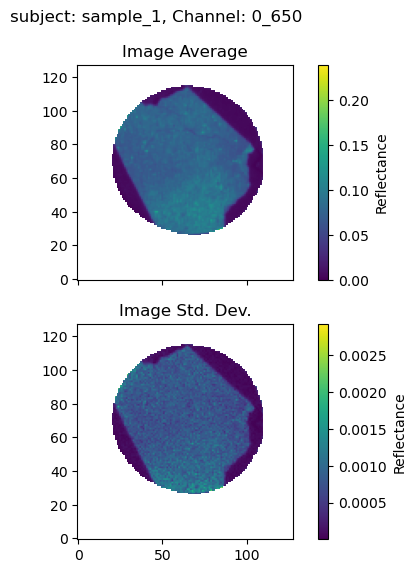

../data/sample_1/0_650
Mean image written to ../data/sample_1/0_650/650_mean_rfl.tif
Error image written to ../data/sample_1/0_650/650_error_rfl.tif


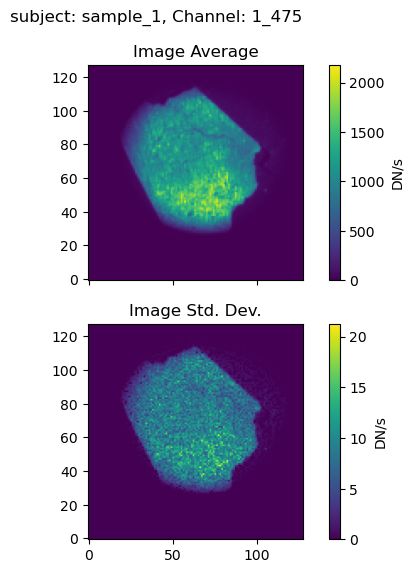

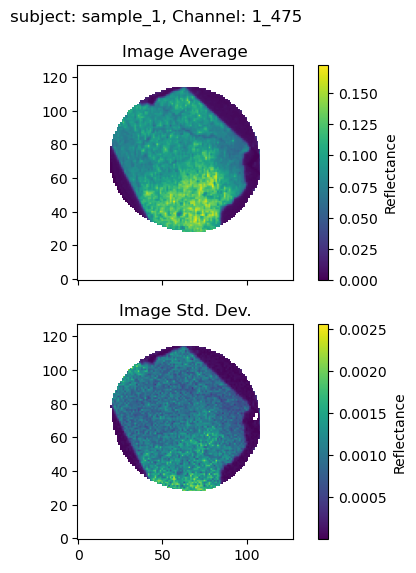

../data/sample_1/1_475
Mean image written to ../data/sample_1/1_475/475_mean_rfl.tif
Error image written to ../data/sample_1/1_475/475_error_rfl.tif


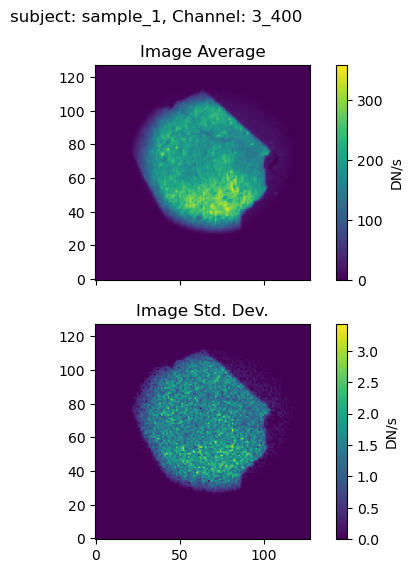

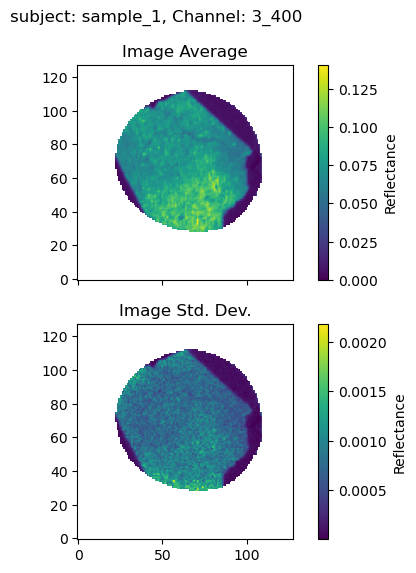

../data/sample_1/3_400
Mean image written to ../data/sample_1/3_400/400_mean_rfl.tif
Error image written to ../data/sample_1/3_400/400_error_rfl.tif


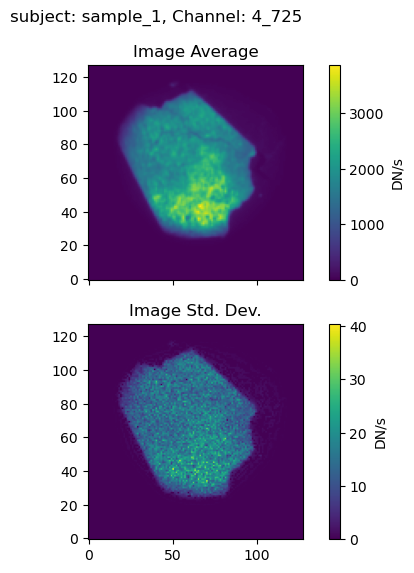

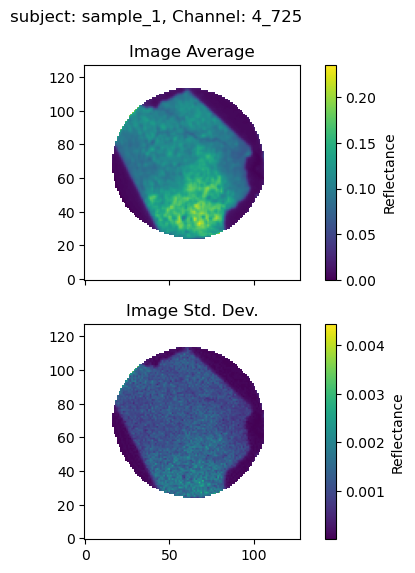

../data/sample_1/4_725
Mean image written to ../data/sample_1/4_725/725_mean_rfl.tif
Error image written to ../data/sample_1/4_725/725_error_rfl.tif


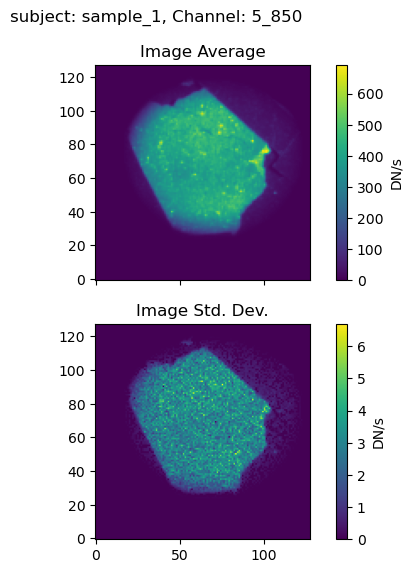

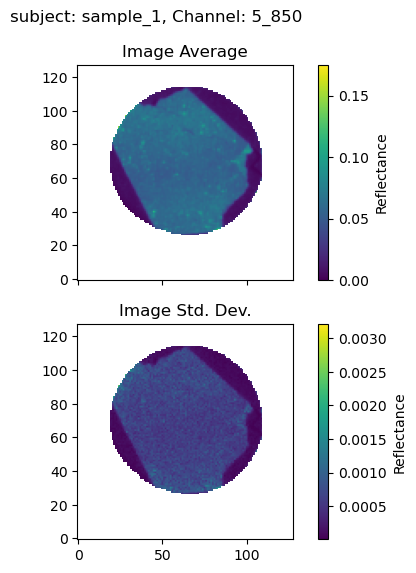

../data/sample_1/5_850
Mean image written to ../data/sample_1/5_850/850_mean_rfl.tif
Error image written to ../data/sample_1/5_850/850_error_rfl.tif


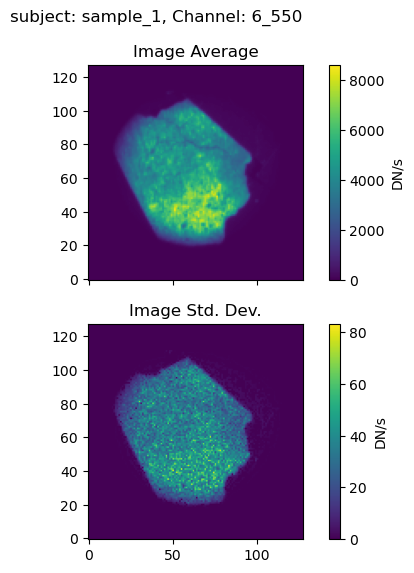

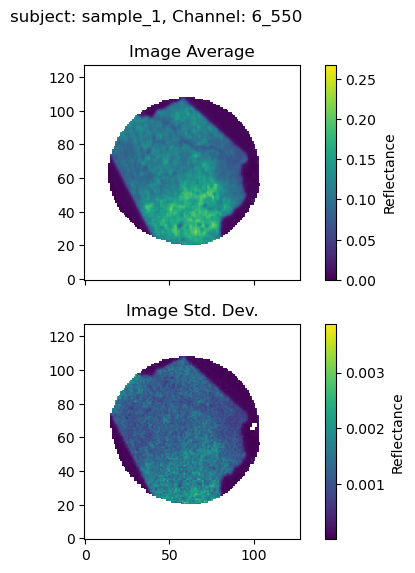

../data/sample_1/6_550
Mean image written to ../data/sample_1/6_550/550_mean_rfl.tif
Error image written to ../data/sample_1/6_550/550_error_rfl.tif


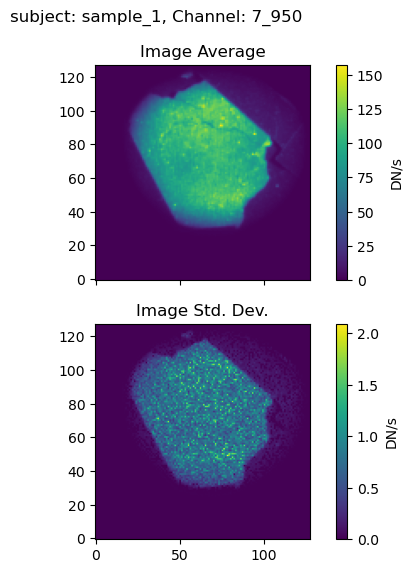

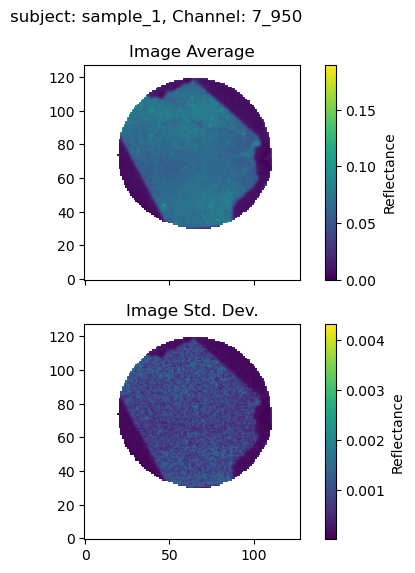

../data/sample_1/7_950
Mean image written to ../data/sample_1/7_950/950_mean_rfl.tif
Error image written to ../data/sample_1/7_950/950_error_rfl.tif


In [59]:
target = 'sample_1'
channels = sorted(list(Path('..', 'data',target).glob('[!.]*')))
reflectance = {}
samples = {}
for channel_path in channels:
    channel = channel_path.name
    # load the sample images
    smpl = osp.LightImage(target, channel)
    smpl.image_load()
    # load the sample dark frames
    dark_smpl = osp.DarkImage(target, channel)
    dark_smpl.image_load()
    # subtract the dark frame
    smpl.dark_subtract(dark_smpl)
    samples[channel] = smpl
    # apply exposure correction
    smpl.correct_exposure()
    smpl.image_display(roi=True)
    # apply calibration coefficients
    cali_coeff = cali_coeffs[channel]
    refl = osp.ReflectanceImage(smpl)
    refl.calibrate_reflectance(cali_coeff)
    refl.image_display(roi=True)
    # save the reflectance image
    refl.save_tiff()
    reflectance[channel] = refl
    

# Geometric Alignment
- Load, average and bias correct Geometric images
- Balance images (TBD)
- Extract camera geometric calibration coefficients (TBD)
- Apply image coregistration (TBD)

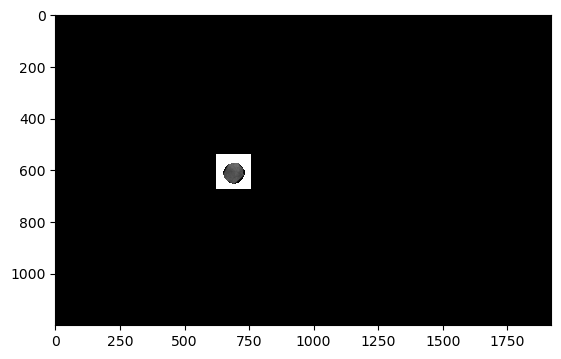

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:490: RuntimeWarning: invalid value encountered in subtract
  src = ax[0].imshow(query_reg-train_img, cmap='RdBu', origin='lower', vmin=-col_max, vmax=col_max)
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:492: RuntimeWarning: invalid value encountered in subtract
  err = ax[1].imshow(np.abs(query_reg-train_img)/train_img, origin='lower')
/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:492: RuntimeWarning: invalid value encountered in divide
  err = ax[1].imshow(np.abs(query_reg-train_img)/train_img, origin='lower')


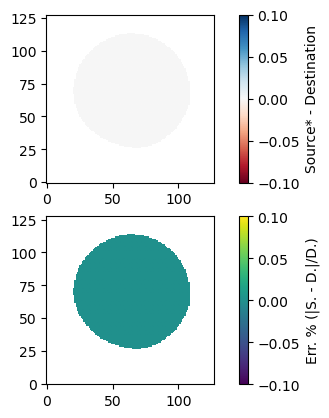

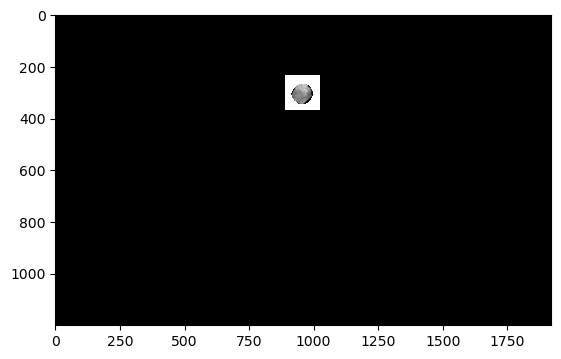

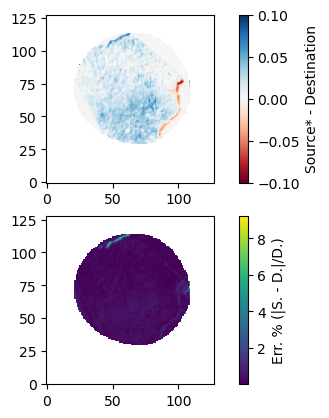

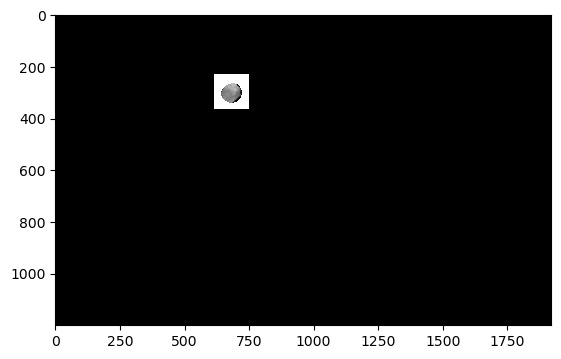

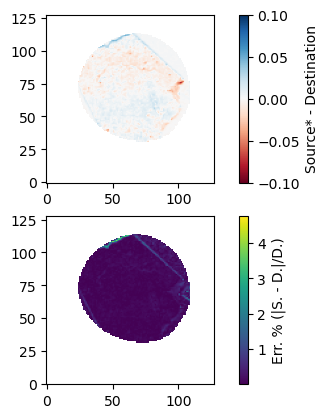

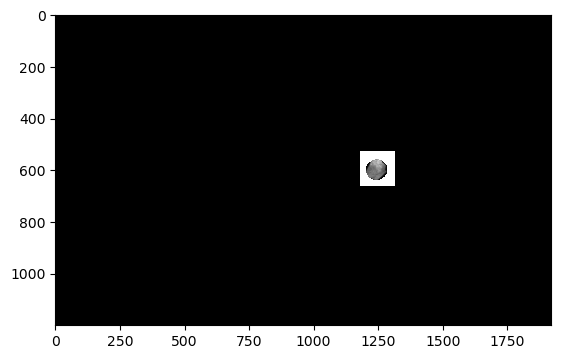

/Users/sci/Documents/projects/orochi_simulator_control/src/orochi_sim_proc.py:492: RuntimeWarning: divide by zero encountered in divide
  err = ax[1].imshow(np.abs(query_reg-train_img)/train_img, origin='lower')


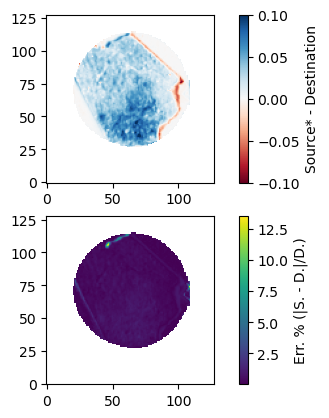

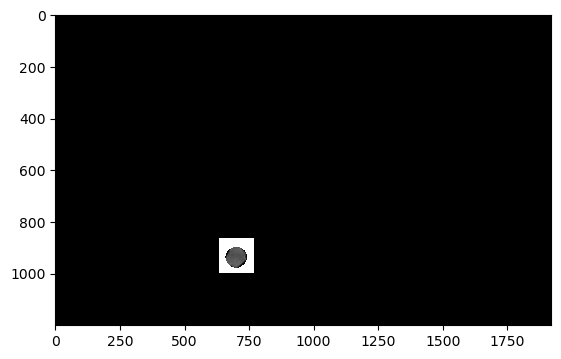

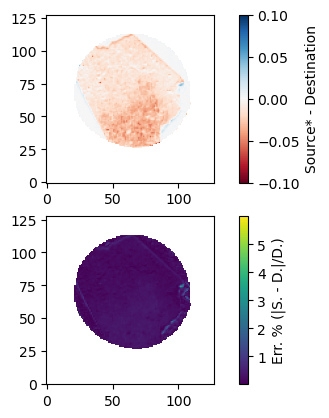

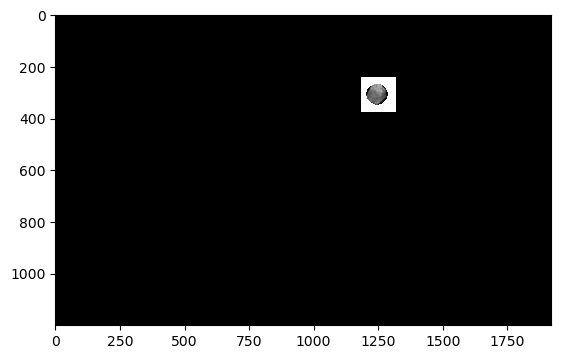

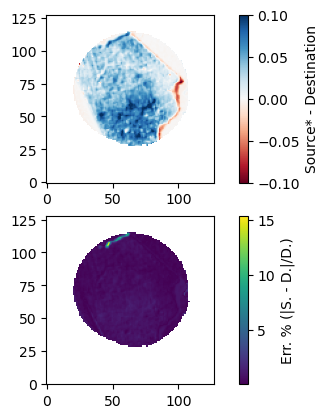

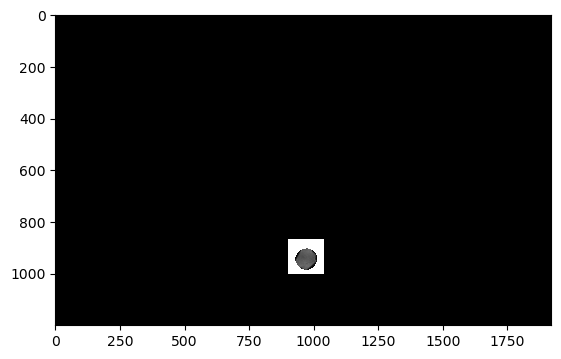

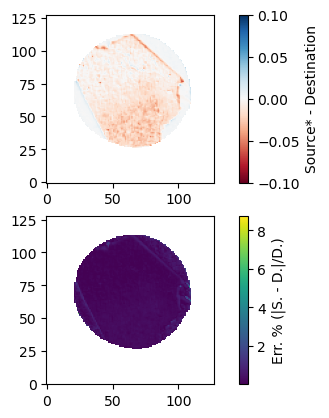

In [64]:
channels = list(reflectance.keys())
destination = channels[0]
sample_dest = reflectance[destination]
for channel in channels:
    sample_src = reflectance[channel] 
    sample_coal = coals[channel]   
    src = osp.CoAlignedImage(
                sample_src, 
                destination_image=sample_dest, 
                homography=sample_coal.homography, 
                roi=False)
    src.align_images(roi=True)